In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#print("train : ", train.shape, " ", " test : ", test.shape)
train.head()
test.head()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wilhelms, Mr. Charles",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [50]:
'''
print(type(train))
print(type(train['Age']))
print(train.loc[0]) # loc 인자가 하나면 한 행을 선택
print(train.loc[0, ['Age', 'Sex']]) # 두번째 인자에는 선택할 feature를 배열로 나열한다.
print(train.loc[train['Cabin'].isnull()==False, ["Cabin"]]) #앞에 조건문으로 boolean을 넣을수도 있다.
'''
#print(train.loc[10, "Sex":"Parch"])
print(train[0:10]["Age"])


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 스타일/폰트 등의 속성 설정. 기본값으로 설정한다.

Pclass에 따른 생존률을 계산해 본다.<br>
Survived가 1은 생존, 0은 사망이므로 Pclass에 따라 그룹을 지어서 평균을 내면 Pclass에 따른 상대적인 생존률을 비교할 수 있을 것이다.

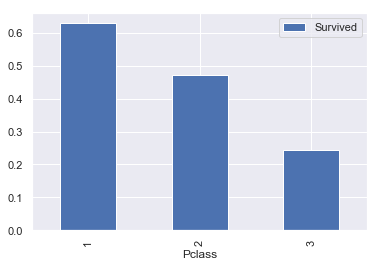

In [53]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

Seaborn.countplot()은 각 카테고리별로 데이터가 얼마나 있는지 표시할 수 있다<br>
데이터프레임에만 사용할 수 있다.<br>
hue에 column을 더 지정해서 1단계 더 세분화해서 표시할 수 있다.<br>
seaborn.countplot(x=None, data=None, hue=None ...) <br>
 - x : x축에 보여줄 데이터 
 - hue : x마다 hue 타입별로 분류해서 표시한다.
 - data : 데이터프레임

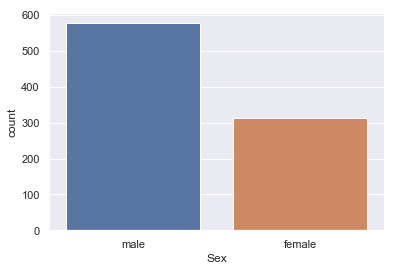

In [54]:
sns.countplot('Sex', data=train)

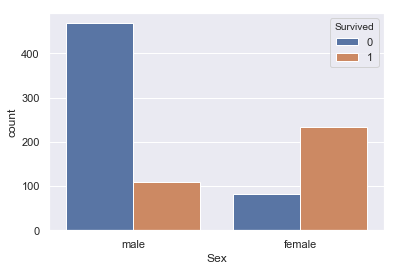

In [55]:
sns.countplot('Sex', hue='Survived', data=train)

kde(Kernel density estimation) : 임의 변수의 확률밀도함수를 추정하기 위한 non-parametric한 방법.<br>
feature 분포를 smooth하게 본다고 생각하면 되려나???

714


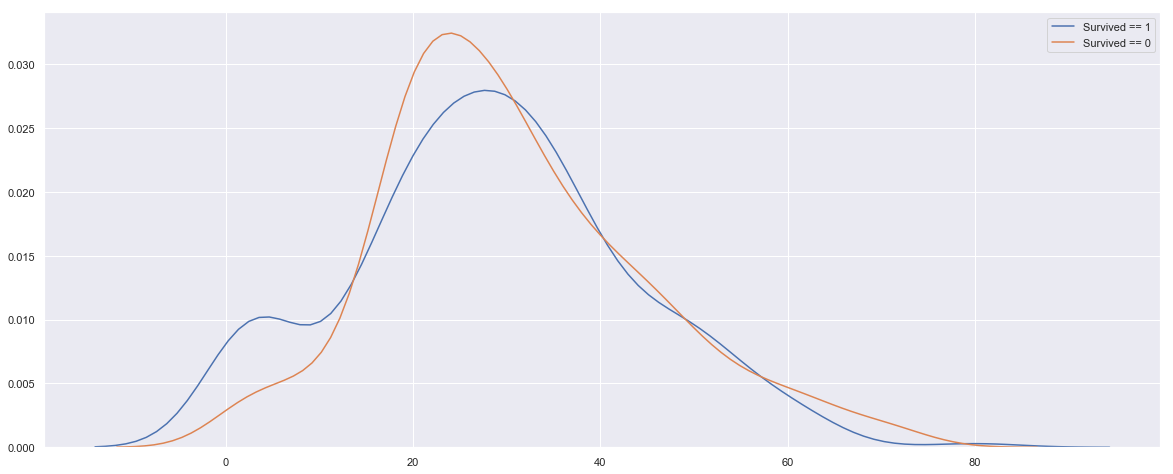

In [60]:
df = train[train['Age'].isnull() == False] # age는 nan이 많으므로 일단 걸러 내야 한다.
print(df.shape[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

위에서 Survived/Dead를 별개로 분포를 보는 것보다는 아래처럼 나이대를 나눠서 구간마다 Survived/Dead의 수를 비교하는 것이 한눈에 더 들어올 것 같음

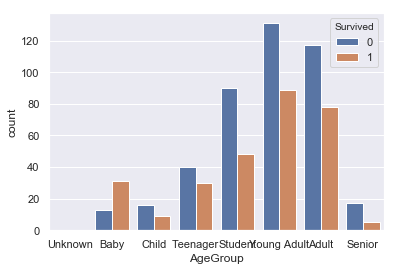

In [61]:
import numpy as np
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
sns.countplot('AgeGroup', hue='Survived', data=train)

DataFrame에 plot으로 그래프를 그릴 수 있다.

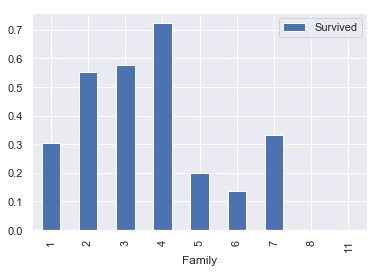

In [62]:
_train = train.copy()
_train['Family'] = _train["SibSp"] + _train["Parch"] + 1
_train[['Family', "Survived"]].groupby('Family').mean().plot.bar()

각각의 Pclass에 대해 Age의 분포를 plotting.

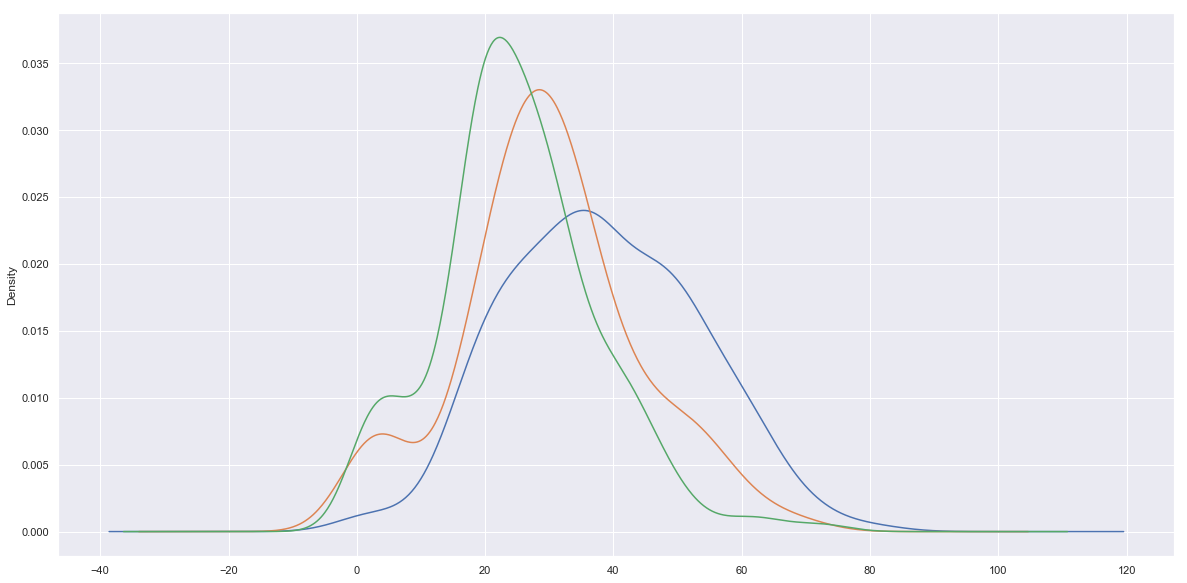

In [64]:
plt.figure(figsize=(20 ,10))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.show()

누적 그래프로 범위가 확장될수록 평균 값이 어떻게 변하는지 알 수 있다.

aga  0.42  ~  80.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


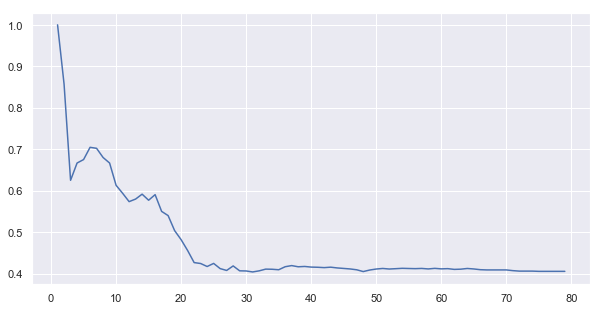

In [65]:
survival_ratios = []
age_min = train['Age'].min()
age_max = train['Age'].max()
print("aga ", age_min , " ~ ", age_max)
for i in range(int(age_min), int(age_max)):
    cummulated = train[train['Age'] < i]['Survived']
    survival_rate = cummulated.sum() / cummulated.shape[0]
    survival_ratios.append(survival_rate)
    
plt.figure(figsize=(10, 5))
plt.plot(survival_ratios)
plt.show()
    

seaborn의 violinplot을 사용해서 3개 feature를 한 그래프에 표현할 수 있다.<br>

seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs) <br>

**x, y, hue : x축, y축, 가운데 그려질 데이터 feature 이름** <br>
- x : x축에서 나열될 categorical feature
- y : y축에 표시될 feature
- hue : 세로축으로 표시될 binary feature(y축에 따른 feature의 분포가 표시 된다.)
<br>

x, y, hue : x축, y축, 가운데 그려질 데이터 feature 이름 <br>
scale {“area”, “count”, “width”} : 
 - area : violin 영역이 동일해 짐
 - count : violin의 폭은 데이터 수에 따라 scale될 예정
 - width : 양쪽 width의 max를 동일하게 그림.

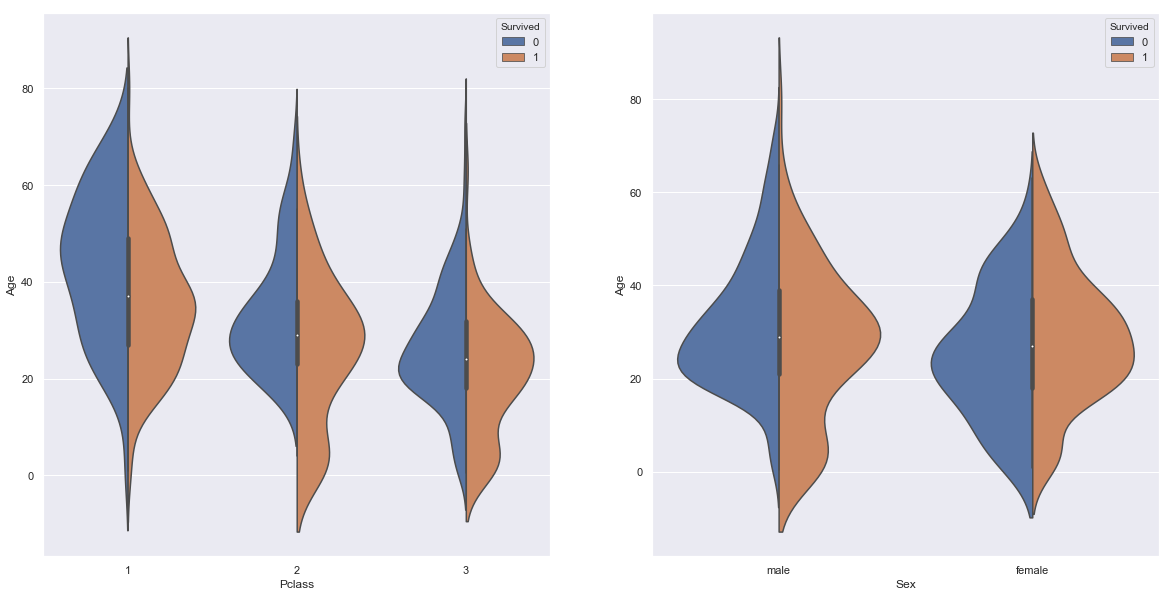

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, scale='width', split=True, ax=ax[0])
sns.violinplot("Sex", "Age", hue="Survived", data=train, scale='width', split=True, ax=ax[1])